In [1]:
import os
import numpy as np
import pandas as pd
import os
import time
import os
# You can use `tensorflow`, `pytorch`, `jax` here
# KerasCore makes the notebook backend agnostic :)
os.environ["KERAS_BACKEND"] = "tensorflow"

#import keras_cv
#import keras_core as keras
#from keras_core import layers

import numpy as np
import pandas as pd
#import tensorflow as tf
from matplotlib import pyplot as plt
#from sklearn.model_selection import train_test_split
os.environ['KAGGLE_CONFIG_DIR'] = r"D:\Kaggle\Kaggle\RSNA_2024_Lumbar_Spine_Degenerative_Classification"

In [16]:
os.environ['KAGGLE_CONFIG_DIR'] = r"D:\Kaggle\Kaggle\RSNA_2024_Lumbar_Spine_Degenerative_Classification"

In [17]:
!kaggle competitions download -c rsna-2024-lumbar-spine-degenerative-classification

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\sanja\AppData\Local\Programs\Python\Python312\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in D:\Kaggle\Kaggle\RSNA_2024_Lumbar_Spine_Degenerative_Classification. Or use the environment method.


In [2]:
train_series=pd.read_csv('train_series_descriptions.csv')
train=pd.read_csv('train.csv')
train_label=pd.read_csv('train_label_coordinates.csv')
sample=pd.read_csv('sample_submission.csv')
test_series=pd.read_csv('test_series_descriptions.csv')

In [3]:
train.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,left_subarticular_stenosis_l1_l2,left_subarticular_stenosis_l2_l3,left_subarticular_stenosis_l3_l4,left_subarticular_stenosis_l4_l5,left_subarticular_stenosis_l5_s1,right_subarticular_stenosis_l1_l2,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
1,4646740,Normal/Mild,Normal/Mild,Moderate,Severe,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Severe,Normal/Mild,Normal/Mild,Moderate,Moderate,Moderate,Normal/Mild
2,7143189,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
3,8785691,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild
4,10728036,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,Normal/Mild


In [4]:
train_series.head()

,study_id,series_id,series_description
0,4003253,702807833,Sagittal T2/STIR
1,4003253,1054713880,Sagittal T1
2,4003253,2448190387,Axial T2
3,4646740,3201256954,Axial T2
4,4646740,3486248476,Sagittal T1


In [5]:
train_label.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [32]:
merge_df = pd.merge(train, train_label, on=['study_id', 'condition', 'level'], how='left')
merge_df.head(15)

,study_id,condition,level,severity,series_id,instance_number,x,y
0,4003253,Spinal Canal Stenosis,L1/L2,Normal/Mild,7.028078e+08,8.0,322.831858,227.964602
1,4003253,Spinal Canal Stenosis,L2/L3,Normal/Mild,7.028078e+08,8.0,320.571429,295.714286
2,4003253,Spinal Canal Stenosis,L3/L4,Normal/Mild,7.028078e+08,8.0,323.030303,371.818182
3,4003253,Spinal Canal Stenosis,L4/L5,Normal/Mild,7.028078e+08,8.0,335.292035,427.327434
4,4003253,Spinal Canal Stenosis,L5/S1,Normal/Mild,7.028078e+08,8.0,353.415929,483.964602
5,4003253,Left Neural Foraminal Narrowing,L1/L2,Normal/Mild,1.054714e+09,11.0,196.070671,126.021201
6,4003253,Left Neural Foraminal Narrowing,L2/L3,Normal/Mild,1.054714e+09,12.0,191.321555,170.120141
7,4003253,Left Neural Foraminal Narrowing,L3/L4,Normal/Mild,1.054714e+09,12.0,187.878354,217.245081
8,4003253,Left Neural Foraminal Narrowing,L4/L5,Moderate,1.054714e+09,11.0,186.504472,251.592129
9,4003253,Left Neural Foraminal Narrowing,L5/S1,Normal/Mild,1.054714e+09,11.0,197.100569,289.457306


In [169]:
final_merge_df = pd.merge(merge_df, train_series, on=['study_id', 'series_id'], how='left')
final_merge_df.head(30)

,study_id,condition,level,severity,series_id,instance_number,x,y,series_description
0,4003253,Spinal Canal Stenosis,L1/L2,Normal/Mild,7.028078e+08,8.0,322.831858,227.964602,Sagittal T2/STIR
1,4003253,Spinal Canal Stenosis,L2/L3,Normal/Mild,7.028078e+08,8.0,320.571429,295.714286,Sagittal T2/STIR
2,4003253,Spinal Canal Stenosis,L3/L4,Normal/Mild,7.028078e+08,8.0,323.030303,371.818182,Sagittal T2/STIR
3,4003253,Spinal Canal Stenosis,L4/L5,Normal/Mild,7.028078e+08,8.0,335.292035,427.327434,Sagittal T2/STIR
4,4003253,Spinal Canal Stenosis,L5/S1,Normal/Mild,7.028078e+08,8.0,353.415929,483.964602,Sagittal T2/STIR
5,4003253,Left Neural Foraminal Narrowing,L1/L2,Normal/Mild,1.054714e+09,11.0,196.070671,126.021201,Sagittal T1
6,4003253,Left Neural Foraminal Narrowing,L2/L3,Normal/Mild,1.054714e+09,12.0,191.321555,170.120141,Sagittal T1
7,4003253,Left Neural Foraminal Narrowing,L3/L4,Normal/Mild,1.054714e+09,12.0,187.878354,217.245081,Sagittal T1
8,4003253,Left Neural Foraminal Narrowing,L4/L5,Moderate,1.054714e+09,11.0,186.504472,251.592129,Sagittal T1
9,4003253,Left Neural Foraminal Narrowing,L5/S1,Normal/Mild,1.054714e+09,11.0,197.100569,289.457306,Sagittal T1


In [ ]:
final_merge_df.dropna(inplace=True)

In [171]:
# Create the row_id column
final_merge_df['row_id'] = (
    final_merge_df['study_id'].astype(str) + '_' +
    final_merge_df['condition'].str.lower().str.replace(' ', '_') + '_' +
    final_merge_df['level'].str.lower().str.replace('/', '_')
)

# Create the image_path column
final_merge_df['image_path'] = (
    'train_images/' + 
    final_merge_df['study_id'].astype(str) + '/' +
    final_merge_df['series_id'].astype(int).astype(str) + '/' +
    final_merge_df['instance_number'].astype(int).astype(str) + '.dcm'
)


# Note: Check image path, since there's 1 instance id, for 1 image, but there's many more images other than the ones labelled in the instance ID. 

# Display the updated dataframe
final_merge_df.head(5)

,study_id,condition,level,severity,series_id,instance_number,x,y,series_description,row_id,image_path
0,4003253,Spinal Canal Stenosis,L1/L2,Normal/Mild,702807833.0,8.0,322.831858,227.964602,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l1_l2,train_images/4003253/702807833/8.dcm
1,4003253,Spinal Canal Stenosis,L2/L3,Normal/Mild,702807833.0,8.0,320.571429,295.714286,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l2_l3,train_images/4003253/702807833/8.dcm
2,4003253,Spinal Canal Stenosis,L3/L4,Normal/Mild,702807833.0,8.0,323.030303,371.818182,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l3_l4,train_images/4003253/702807833/8.dcm
3,4003253,Spinal Canal Stenosis,L4/L5,Normal/Mild,702807833.0,8.0,335.292035,427.327434,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l4_l5,train_images/4003253/702807833/8.dcm
4,4003253,Spinal Canal Stenosis,L5/S1,Normal/Mild,702807833.0,8.0,353.415929,483.964602,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l5_s1,train_images/4003253/702807833/8.dcm


In [172]:
#Label encoding for severity and level
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_merge_df['severity'] = le.fit_transform(final_merge_df['severity'])
final_merge_df['level'] = le.fit_transform(final_merge_df['level'])
final_merge_df.head(30)

,study_id,condition,level,severity,series_id,instance_number,x,y,series_description,row_id,image_path
0,4003253,Spinal Canal Stenosis,0,1,7.028078e+08,8.0,322.831858,227.964602,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l1_l2,train_images/4003253/702807833/8.dcm
1,4003253,Spinal Canal Stenosis,1,1,7.028078e+08,8.0,320.571429,295.714286,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l2_l3,train_images/4003253/702807833/8.dcm
2,4003253,Spinal Canal Stenosis,2,1,7.028078e+08,8.0,323.030303,371.818182,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l3_l4,train_images/4003253/702807833/8.dcm
3,4003253,Spinal Canal Stenosis,3,1,7.028078e+08,8.0,335.292035,427.327434,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l4_l5,train_images/4003253/702807833/8.dcm
4,4003253,Spinal Canal Stenosis,4,1,7.028078e+08,8.0,353.415929,483.964602,Sagittal T2/STIR,4003253_spinal_canal_stenosis_l5_s1,train_images/4003253/702807833/8.dcm
5,4003253,Left Neural Foraminal Narrowing,0,1,1.054714e+09,11.0,196.070671,126.021201,Sagittal T1,4003253_left_neural_foraminal_narrowing_l1_l2,train_images/4003253/1054713880/11.dcm
6,4003253,Left Neural Foraminal Narrowing,1,1,1.054714e+09,12.0,191.321555,170.120141,Sagittal T1,4003253_left_neural_foraminal_narrowing_l2_l3,train_images/4003253/1054713880/12.dcm
7,4003253,Left Neural Foraminal Narrowing,2,1,1.054714e+09,12.0,187.878354,217.245081,Sagittal T1,4003253_left_neural_foraminal_narrowing_l3_l4,train_images/4003253/1054713880/12.dcm
8,4003253,Left Neural Foraminal Narrowing,3,0,1.054714e+09,11.0,186.504472,251.592129,Sagittal T1,4003253_left_neural_foraminal_narrowing_l4_l5,train_images/4003253/1054713880/11.dcm
9,4003253,Left Neural Foraminal Narrowing,4,1,1.054714e+09,11.0,197.100569,289.457306,Sagittal T1,4003253_left_neural_foraminal_narrowing_l5_s1,train_images/4003253/1054713880/11.dcm


In [173]:
import pydicom as dcm
def display_dicom_image_with_labels(img_path):
    dicom_data = dcm.dcmread(img_path)
    full_study_series_id=dicom_data.SeriesInstanceUID
    study_id,series_id=full_study_series_id.split('.')
    instance_number=dicom_data.InstanceNumber
    image_data=dicom_data.pixel_array
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(image_data, cmap='gray')
    print(instance_number)
    if final_merge_df.loc[(final_merge_df['study_id']==int(study_id)) & (final_merge_df['series_id']==int(series_id)) & (final_merge_df['instance_number']==int(instance_number))].shape[0] > 0:
        ax.set_title(f"Severity: {final_merge_df.loc[(final_merge_df['study_id']==int(study_id)) & (final_merge_df['series_id']==int(series_id)) & (final_merge_df['instance_number']==int(instance_number)),'severity'].values[0]}" + "\n" + f"Level: {final_merge_df.loc[(final_merge_df['study_id']==int(study_id)) & (final_merge_df['series_id']==int(series_id)) & (final_merge_df['instance_number']==int(instance_number)),'level'].values[0]}")
    #plt.show()
    return image_data

8


(640, 640)

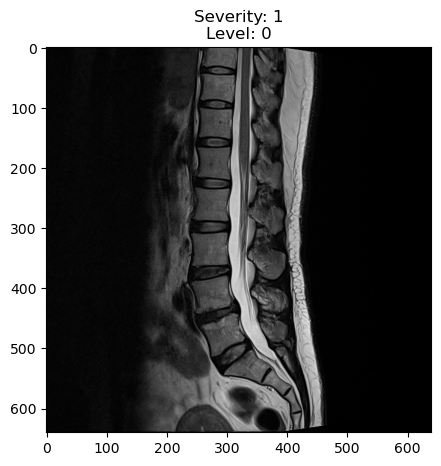

In [174]:
display_dicom_image_with_labels(train_images_path).shape

In [175]:
train_images_path='train_images\\4003253\\702807833\\8.dcm'

In [176]:
import tensorflow as tf
class Config:
    IMAGE_SIZE = [256, 256]
    RESIZE_DIM = 256
    BATCH_SIZE = 64
    AUTOTUNE = tf.data.AUTOTUNE
config = Config()

In [240]:
import tensorflow as tf
import pydicom as dcm

def load_and_preprocess_image(img_path, input_label, severity_label):
    # Decode numpy array to string
    img_path = img_path.decode('utf-8')

    # Read DICOM image
    dicom_data = dcm.dcmread(img_path)

    # Extract pixel array and normalize
    image = tf.cast(dicom_data.pixel_array, tf.float32) / 255.0

    return image, input_label, severity_label

def load_and_preprocess_image_wrapper(img_path, input_label, severity_label):
    return tf.py_function(load_and_preprocess_image, [img_path, input_label, severity_label], [tf.float32, tf.int32, tf.int32])

def create_dataset(image_paths, input_labels, severity_labels, batch_size=32):
    # Create dataset from image paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, input_labels, severity_labels))

    # Load and preprocess images
    dataset = dataset.map(
    lambda img_path, input_label, severity_label: tf.numpy_function(
        func=load_and_preprocess_image,
        inp=[img_path, input_label, severity_label],
        Tout=[tf.float32, tf.int32, tf.int32]
    ),
    num_parallel_calls=tf.data.experimental.AUTOTUNE
    )   

    # Set the shapes manually
    dataset = dataset.map(lambda img, input_label, severity_label: 
                      (tf.ensure_shape(img, (256, 256,3)), input_label, severity_label))

    # Batch the dataset
    dataset = dataset.batch(batch_size)

    return dataset

# Example usage:
image_paths = final_merge_df['image_path'].values
input_labels = final_merge_df['level'].values  # Assuming 'level' is the input column
severity_labels = final_merge_df['severity'].values  # Assuming 'severity' is the target column
batch_size = 32
dataset = create_dataset(image_paths, input_labels, severity_labels, batch_size=batch_size)


In [241]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [242]:
train_size

1064

In [243]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

In [246]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None), TensorSpec(shape=<unknown>, dtype=tf.int32, name=None))>

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [248]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [249]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [250]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [251]:
logdir='logdir'

In [252]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [253]:
def reshape_function(image, label1, label2):
    return tf.reshape(image, [256, 256, 3]), label1, label2

train = train.map(reshape_function)

In [259]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type _MapDataset).

In [63]:
corr_matrix = train.corr()
print(corr_matrix)

                                        study_id  spinal_canal_stenosis_l1_l2  \
study_id                                1.000000                    -0.021782   
spinal_canal_stenosis_l1_l2            -0.021782                     1.000000   
spinal_canal_stenosis_l2_l3             0.000157                     0.365125   
spinal_canal_stenosis_l3_l4            -0.020857                     0.242687   
spinal_canal_stenosis_l4_l5            -0.029734                     0.113750   
spinal_canal_stenosis_l5_s1             0.017681                     0.053063   
left_neural_foraminal_narrowing_l1_l2  -0.041155                     0.274655   
left_neural_foraminal_narrowing_l2_l3  -0.023618                     0.165360   
left_neural_foraminal_narrowing_l3_l4  -0.038724                     0.142302   
left_neural_foraminal_narrowing_l4_l5  -0.040777                     0.102898   
left_neural_foraminal_narrowing_l5_s1  -0.016870                     0.108402   
right_neural_foraminal_narro

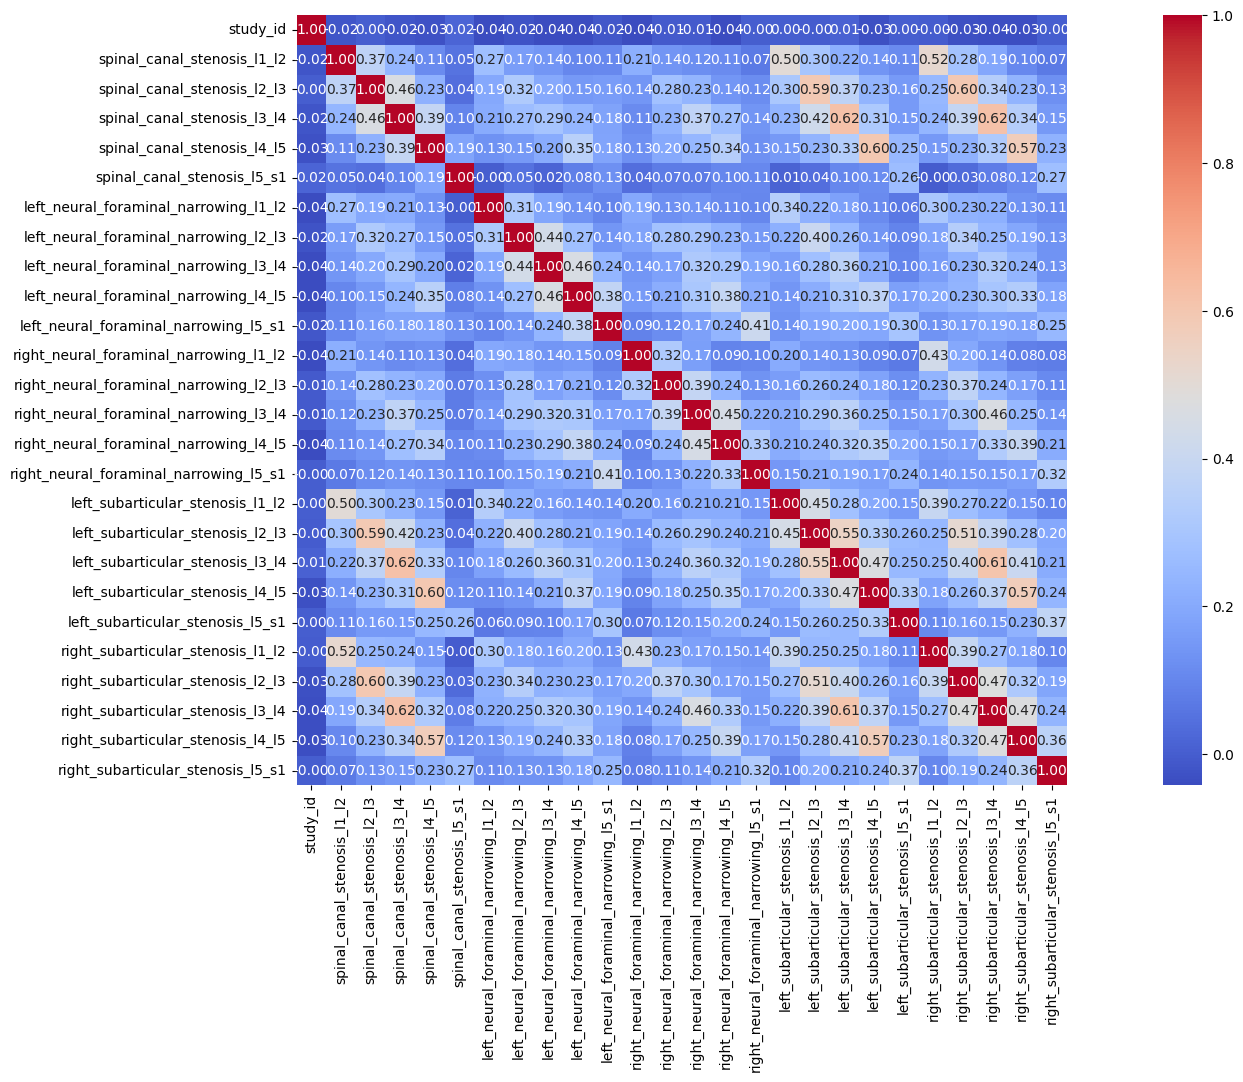

In [66]:
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')
plt.show()

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
import pandas as pd


# Features to calculate correlation for
corr_features = initial_columns

# Verify that these features exist in the DataFrame
print("Columns in train:", train.columns)

# Verify the shape and sample of the data used for correlation
print("Shape of data used for correlation:", train[corr_features].shape)
print("Sample data used for correlation:\n", train[corr_features].head())

# Compute the correlation matrix
cc = np.corrcoef(train[corr_features], rowvar=False)

# Verify the shape of the correlation matrix
print("Shape of correlation matrix:", cc.shape)

# Plot the heatmap if the matrix is 2D
if cc.ndim == 2:
    plt.figure(figsize=(11, 11))
    sns.heatmap(cc, center=0, cmap='coolwarm', annot=True, fmt='.1f', 
                xticklabels=corr_features, yticklabels=corr_features)
    plt.title('Correlation matrix')
    plt.show()
else:
    print("Error: Correlation matrix is not 2D.")


Columns in train: Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_

In [11]:
len(train['study_id'].unique())


1790

In [28]:
train.columns

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

In [29]:
train_label.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [30]:
print(train_series[train_series['study_id']==4096820034])

        study_id   series_id series_description
5997  4096820034   300517765           Axial T2
5998  4096820034  2097107888           Axial T2
5999  4096820034  2602265508   Sagittal T2/STIR
6000  4096820034  2679683906           Axial T2
6001  4096820034  3114813181           Axial T2
6002  4096820034  3236751045        Sagittal T1


count_of_series
2       3
3    1632
4     309
5      30
6       1
Name: count, dtype: int64


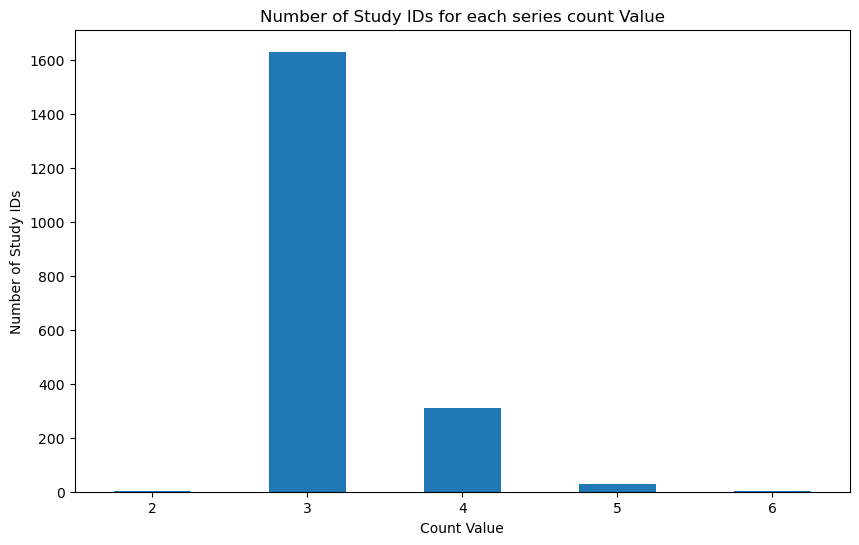

In [9]:
import seaborn as sns
df = pd.DataFrame()
df['study_id'] = train_series['study_id'].unique()
df['count_of_series']=train_series.groupby('study_id')['series_id'].count().values
df.head()
count_of_counts = df['count_of_series'].value_counts().sort_index()
print(count_of_counts)
# Plot the data
plt.figure(figsize=(10, 6))
count_of_counts.plot(kind='bar')
plt.xlabel('Count Value')
plt.ylabel('Number of Study IDs')
plt.title('Number of Study IDs for each series count Value')
plt.xticks(rotation=0)
plt.show()

In [11]:
df = pd.DataFrame()
df['series_id'] = train_label['series_id'].unique()
df['count_of_series']=train_label.groupby('series_id')['instance_number'].count().values
df.head()

,series_id,count_of_series
0,702807833,10
1,1054713880,10
2,2448190387,5
3,3201256954,10
4,3486248476,5


count_of_series
1       21
2       42
3       79
4      172
5     2217
6      201
7       14
8       82
9       18
10    3444
15       1
Name: count, dtype: int64


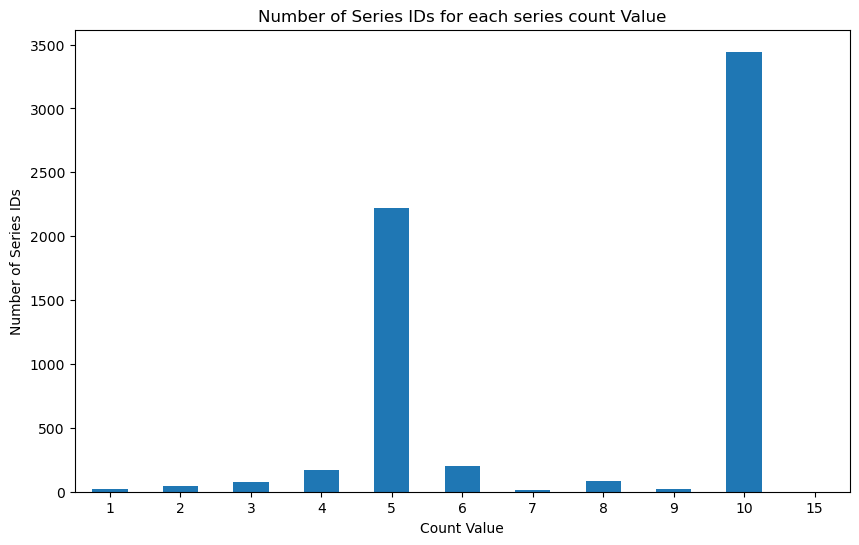

In [13]:
import seaborn as sns

count_of_counts = df['count_of_series'].value_counts().sort_index()
print(count_of_counts)
# Plot the data
plt.figure(figsize=(10, 6))
count_of_counts.plot(kind='bar')
plt.xlabel('Count Value')
plt.ylabel('Number of Series IDs')
plt.title('Number of Series IDs for each series count Value')
plt.xticks(rotation=0)
plt.show()

In [14]:
df.head()

,series_id,count_of_series
0,702807833,10
1,1054713880,10
2,2448190387,5
3,3201256954,10
4,3486248476,5


In [19]:
test_series.head()

,study_id,series_id,series_description
0,44036939,2828203845,Sagittal T1
1,44036939,3481971518,Axial T2
2,44036939,3844393089,Sagittal T2/STIR


In [20]:
sample.head(100)

,row_id,normal_mild,moderate,severe
0,44036939_left_neural_foraminal_narrowing_l1_l2,0.333333,0.333333,0.333333
1,44036939_left_neural_foraminal_narrowing_l2_l3,0.333333,0.333333,0.333333
2,44036939_left_neural_foraminal_narrowing_l3_l4,0.333333,0.333333,0.333333
3,44036939_left_neural_foraminal_narrowing_l4_l5,0.333333,0.333333,0.333333
4,44036939_left_neural_foraminal_narrowing_l5_s1,0.333333,0.333333,0.333333
5,44036939_left_subarticular_stenosis_l1_l2,0.333333,0.333333,0.333333
6,44036939_left_subarticular_stenosis_l2_l3,0.333333,0.333333,0.333333
7,44036939_left_subarticular_stenosis_l3_l4,0.333333,0.333333,0.333333
8,44036939_left_subarticular_stenosis_l4_l5,0.333333,0.333333,0.333333
9,44036939_left_subarticular_stenosis_l5_s1,0.333333,0.333333,0.333333


In [21]:
df_train_step_1 = pd.merge(left=train, right=train_label, how='left', on='study_id').reset_index(drop=True)
df_train_step_1.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,right_subarticular_stenosis_l2_l3,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_id,instance_number,condition,level,x,y
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [22]:
df_train = pd.merge(left=df_train_step_1, right=train_series, how='left', on=['study_id', 'series_id']).reset_index(drop=True)
df_train.head()

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,right_subarticular_stenosis_l3_l4,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_id,instance_number,condition,level,x,y,series_description
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Sagittal T2/STIR
1,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Sagittal T2/STIR
2,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L3/L4,323.030303,371.818182,Sagittal T2/STIR
3,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L4/L5,335.292035,427.327434,Sagittal T2/STIR
4,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L5/S1,353.415929,483.964602,Sagittal T2/STIR


In [31]:
part_1 = os.listdir('train_images')
part_1 = list(filter(lambda x: x.find('.DS') == -1, part_1))

In [24]:
p1 = [(x, f"train_images/{x}") for x in part_1]

In [25]:
meta_obj = { p[0]: { 'folder_path': p[1], 
                    'SeriesInstanceUIDs': [] 
                   } 
            for p in p1 }

In [26]:
meta_obj

{'100206310': {'folder_path': 'train_images/100206310',
  'SeriesInstanceUIDs': []},
 '1002894806': {'folder_path': 'train_images/1002894806',
  'SeriesInstanceUIDs': []},
 '1004726367': {'folder_path': 'train_images/1004726367',
  'SeriesInstanceUIDs': []},
 '1008446160': {'folder_path': 'train_images/1008446160',
  'SeriesInstanceUIDs': []},
 '1009445512': {'folder_path': 'train_images/1009445512',
  'SeriesInstanceUIDs': []},
 '1009905322': {'folder_path': 'train_images/1009905322',
  'SeriesInstanceUIDs': []},
 '1012375618': {'folder_path': 'train_images/1012375618',
  'SeriesInstanceUIDs': []},
 '1013589491': {'folder_path': 'train_images/1013589491',
  'SeriesInstanceUIDs': []},
 '1013791258': {'folder_path': 'train_images/1013791258',
  'SeriesInstanceUIDs': []},
 '1018005303': {'folder_path': 'train_images/1018005303',
  'SeriesInstanceUIDs': []},
 '1019430579': {'folder_path': 'train_images/1019430579',
  'SeriesInstanceUIDs': []},
 '1020394063': {'folder_path': 'train_images/

In [27]:
for m in meta_obj:
    meta_obj[m]['SeriesInstanceUIDs'] = list(
        filter(lambda x: x.find('.DS') == -1, 
               os.listdir(meta_obj[m]['folder_path'])
              )
    )

In [127]:
class Config:
    SEED = 42
    IMAGE_SIZE = [256, 256]
    BATCH_SIZE = 64
    EPOCHS = 10
    TARGET_COLS  = [
        'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
       'right_subarticular_stenosis_l4_l5',
       'right_subarticular_stenosis_l5_s1'
    ]
    AUTOTUNE = tf.data.AUTOTUNE

config = Config()

In [128]:
keras.utils.set_random_seed(seed=config.SEED)

In [ ]:
%%time

import pydicom
import numpy as np
import cv2
import os
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from pathlib import Path
from pydicom.pixel_data_handlers.util import apply_voi_lut
import dicomsdl

RESIZE_TO = (512, 512)

!rm -rf train_images_processed_cv2_dicomsdl_{RESIZE_TO[0]}
!mkdir train_images_processed_cv2_dicomsdl_{RESIZE_TO[0]}

# https://www.kaggle.com/code/tanlikesmath/brain-tumor-radiogenomic-classification-eda/notebook
def dicom_file_to_ary(path):
    dcm_file = dicomsdl.open(str(path))
    data = dcm_file.pixelData()
    data = (data - data.min()) / (data.max() - data.min())

    if dcm_file.getPixelDataInfo()['PhotometricInterpretation'] == "MONOCHROME1":
        data = 1 - data

    data = cv2.resize(data, RESIZE_TO)
    data = (data * 255).astype(np.uint8)
    return data

directories = list(Path('train_images').iterdir())

def process_directory(directory_path):
    parent_directory = str(directory_path).split('/')[-1]
    !mkdir -p train_images_processed_cv2_dicomsdl_{RESIZE_TO[0]}/{parent_directory}
    for image_path in directory_path.iterdir():
        processed_ary = dicom_file_to_ary(image_path)
        
        cv2.imwrite(
            f'train_images_processed_cv2_dicomsdl_{RESIZE_TO[0]}/{parent_directory}/{image_path.stem}.png',
            processed_ary
        )
        

In [28]:
import pydicom
import cv2
def resize_image(image_path, target_size=(224, 224)):
    dicom = pydicom.dcmread(image_path)

    # Convert the DCM image to a numpy array
    image_array = dicom.pixel_array
    # Resize the image using OpenCV
    resized_image = cv2.resize(image_array, (224, 224))
    # Store the resized image in a numpy array
    resized_image_array = np.array(resized_image)

    return resized_image_array

In [50]:
images=[]
# Select only the columns with dtype 'object'
columns=['spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
       'right_subarticular_stenosis_l4_l5',
       'right_subarticular_stenosis_l5_s1']
labels=[]
for study_id in part_1:
    study_id=4003253
    study_id_dir = os.listdir(f'./train_images/{study_id}')
    for series_id in study_id_dir:
        series_id_dir = os.listdir(f'./train_images/{study_id}/{series_id}')
        series_id_instances = train_label
        for instance in series_id_dir:
            image_path=f'./train_images/{study_id}/{series_id}/{instance}'
            resized_image = resize_image(image_path)
            images.append(resized_image)
            filtered_df = df_train[(df_train['study_id']==study_id) & (df_train['series_id']==series_id) ].values
            print(study_id, series_id, instance, filtered_df)
            

4003253 1054713880 1.dcm []
4003253 1054713880 10.dcm []
4003253 1054713880 11.dcm []
4003253 1054713880 12.dcm []
4003253 1054713880 13.dcm []
4003253 1054713880 14.dcm []
4003253 1054713880 15.dcm []
4003253 1054713880 2.dcm []
4003253 1054713880 3.dcm []
4003253 1054713880 4.dcm []
4003253 1054713880 5.dcm []
4003253 1054713880 6.dcm []
4003253 1054713880 7.dcm []
4003253 1054713880 8.dcm []
4003253 1054713880 9.dcm []
4003253 2448190387 1.dcm []
4003253 2448190387 10.dcm []
4003253 2448190387 11.dcm []
4003253 2448190387 12.dcm []
4003253 2448190387 13.dcm []
4003253 2448190387 14.dcm []
4003253 2448190387 15.dcm []
4003253 2448190387 16.dcm []
4003253 2448190387 17.dcm []
4003253 2448190387 18.dcm []
4003253 2448190387 19.dcm []
4003253 2448190387 2.dcm []
4003253 2448190387 20.dcm []
4003253 2448190387 21.dcm []
4003253 2448190387 22.dcm []
4003253 2448190387 23.dcm []
4003253 2448190387 24.dcm []
4003253 2448190387 25.dcm []
4003253 2448190387 26.dcm []
4003253 2448190387 27.dcm

In [45]:
labels

[]

In [40]:
images

[array([[2, 3, 3, ..., 0, 0, 0],
        [3, 4, 4, ..., 0, 0, 0],
        [3, 5, 7, ..., 0, 0, 0],
        ...,
        [1, 3, 5, ..., 0, 0, 0],
        [2, 2, 4, ..., 0, 0, 0],
        [1, 2, 2, ..., 0, 0, 0]], dtype=uint16),
 array([[2, 2, 3, ..., 0, 0, 0],
        [3, 3, 6, ..., 0, 0, 0],
        [3, 4, 7, ..., 0, 0, 0],
        ...,
        [1, 3, 3, ..., 0, 0, 0],
        [1, 2, 2, ..., 0, 0, 0],
        [1, 2, 2, ..., 0, 0, 0]], dtype=uint16),
 array([[3, 3, 3, ..., 0, 0, 0],
        [3, 4, 5, ..., 0, 0, 0],
        [3, 6, 4, ..., 0, 0, 0],
        ...,
        [2, 3, 4, ..., 0, 0, 0],
        [2, 2, 4, ..., 0, 0, 0],
        [1, 2, 2, ..., 0, 0, 0]], dtype=uint16),
 array([[1, 2, 3, ..., 0, 0, 0],
        [2, 4, 5, ..., 0, 0, 0],
        [2, 4, 4, ..., 0, 0, 0],
        ...,
        [3, 5, 5, ..., 0, 0, 0],
        [2, 3, 4, ..., 0, 0, 0],
        [1, 2, 3, ..., 0, 0, 0]], dtype=uint16),
 array([[1, 2, 3, ..., 0, 0, 0],
        [1, 4, 3, ..., 0, 0, 0],
        [2, 3, 4, ..., 0, 

In [ ]:
from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
from keras.utils import to_categorical
y_train_severity = to_categorical(y_train[:, 1], num_classes=3)
y_train_condition = to_categorical(y_train[:, 2], num_classes=3)
y_train_level = to_categorical(y_train[:, 3], num_classes=3)

y_test_severity = to_categorical(y_test[:, 1], num_classes=3)
y_test_condition = to_categorical(y_test[:, 2], num_classes=3)
y_test_level = to_categorical(y_test[:, 3], num_classes=3)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_img = Input(shape=(224, 224, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Fully connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layers
severity_output = Dense(3, activation='softmax', name='severity')(x)
condition_output = Dense(3, activation='softmax', name='condition')(x)
level_output = Dense(3, activation='softmax', name='level')(x)

# Model
model = Model(inputs=input_img, outputs=[severity_output, condition_output, level_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'severity': 'categorical_crossentropy', 'condition': 'categorical_crossentropy', 'level': 'categorical_crossentropy'},
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, 
                    {'severity': y_train_severity, 'condition': y_train_condition, 'level': y_train_level},
                    epochs=25,
                    batch_size=32,
                    validation_split=0.2)

In [ ]:
loss, severity_acc, condition_acc, level_acc = model.evaluate(X_test, 
                                                             {'severity': y_test_severity, 'condition': y_test_condition, 'level': y_test_level})

print(f'Severity Accuracy: {severity_acc}')
print(f'Condition Accuracy: {condition_acc}')
print(f'Level Accuracy: {level_acc}')


In [ ]:
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to labels
predicted_severity = np.argmax(predictions[0], axis=1)
predicted_condition = np.argmax(predictions[1], axis=1)
predicted_level = np.argmax(predictions[2], axis=1)


In [ ]:
import tensorflow as tf
import os

In [130]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [28]:
import pydicom
from PIL import Image
import numpy as np
import os

images=[]
def dicom_to_png(dicom_path):
    dicom = pydicom.dcmread(dicom_path)
    pixel_array = dicom.pixel_array
    pixel_array = (pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array)) * 255
    pixel_array = pixel_array.astype(np.uint8)
    image = Image.fromarray(pixel_array)
    images.append(image)


In [54]:
for study_id in part_1:
    study_id_dir = os.listdir(f'train_images/{study_id}')
    for series_id in study_id_dir:
        series_id_dir = os.listdir(f'train_images/{study_id}/{series_id}')
        series_id_instances = train_label
        for instance in series_id_dir:
            dicom_path = f'train_images/{study_id}/{series_id}/{instance}'
            dicom_to_png(dicom_path)

KeyboardInterrupt: 

{}

In [50]:
df_train["image_path"] = f"train_images"\
                    + "/" + df_train.study_id.astype(str)\
                    + "/" + df_train.series_id.astype(str)\
                    + "/" + df_train.instance_number.astype(str) +".png"
dataframe = df_train.drop_duplicates()

dataframe.head(2)

,study_id,spinal_canal_stenosis_l1_l2,spinal_canal_stenosis_l2_l3,spinal_canal_stenosis_l3_l4,spinal_canal_stenosis_l4_l5,spinal_canal_stenosis_l5_s1,left_neural_foraminal_narrowing_l1_l2,left_neural_foraminal_narrowing_l2_l3,left_neural_foraminal_narrowing_l3_l4,left_neural_foraminal_narrowing_l4_l5,...,right_subarticular_stenosis_l4_l5,right_subarticular_stenosis_l5_s1,series_id,instance_number,condition,level,x,y,series_description,image_path
0,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L1/L2,322.831858,227.964602,Sagittal T2/STIR,train_images/4003253/702807833.0/8.0.png
1,4003253,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Normal/Mild,Moderate,...,Normal/Mild,Normal/Mild,702807833.0,8.0,Spinal Canal Stenosis,L2/L3,320.571429,295.714286,Sagittal T2/STIR,train_images/4003253/702807833.0/8.0.png


In [53]:
path = 'train_images/4003253/702807833.0/8.0.png'
if os.path.exists(path):
    image = Image.open(path)
else:
    print("File not found.")

File not found.


In [55]:
def resize_image(image_path):
    dicom = pydicom.dcmread(image_path)

    # Convert the DCM image to a numpy array
    image_array = dicom.pixel_array

    # Resize the image using OpenCV
    resized_image = cv2.resize(image_array, (224, 224))

    return resized_image

In [60]:
import cv2
# Level 2 try

# Specify the path to the main directory containing patient folders
main_directory = 'train_images'

# Dictionary to store image data
image_data = {}

# Iterate over study_id folders
for study_id in os.listdir(main_directory):
    study_id_dir = os.listdir(f'train_images/{study_id}')
    
    # Iterate over series folders for each patient
    for series_id in study_id_dir:
        series_id_dir = os.listdir(f'train_images/{study_id}/{series_id}')
        # Initialize list to store image arrays for the series
        image_arrays = []
        
        # Iterate over DICOM files in the series folder
        for instance in series_id_dir:
            image_path = f'train_images/{study_id}/{series_id}/{instance}'
            resized_image = resize_image(image_path)

            # Append resized_image array to the list
            image_arrays.append(resized_image)
        
        # Vertically stack DCM images
        stacked_images = np.vstack(image_arrays)
        # Store stacked images as a NumPy array
        np_array = np.array(stacked_images)
        print(series_id, np_array.shape)
        # Store image arrays in the dictionary with (study_id, series_id) tuple as key
        image_data[(study_id, series_id)] = np_array

1012284084 (13440, 224)
1792451510 (4032, 224)
2092806862 (4032, 224)
1252873726 (9408, 224)
801316590 (4032, 224)
866293114 (4032, 224)
1709080005 (4032, 224)
2526352865 (4032, 224)
992525108 (9632, 224)
2539455828 (2688, 224)
2720025375 (2688, 224)
3775545364 (5376, 224)
1705522953 (5600, 224)
2883858173 (5152, 224)
3088482668 (5152, 224)
4018190332 (5600, 224)
1243755365 (3360, 224)
1870630737 (10080, 224)
3461716915 (3360, 224)
352098527 (3808, 224)
4014890929 (3808, 224)
588002243 (5600, 224)
2391548363 (4256, 224)
482346415 (4256, 224)
598943280 (9856, 224)
2460967246 (3808, 224)
821987258 (5600, 224)
995943005 (3808, 224)
1049505285 (5376, 224)
1131788901 (4032, 224)
3398516088 (4032, 224)
3675524442 (7168, 224)
4193900495 (6720, 224)
2116282832 (3360, 224)
3087919501 (3360, 224)
4056780644 (5824, 224)
1523561649 (4032, 224)
3995675145 (4480, 224)
4236155943 (4032, 224)
1603739483 (3360, 224)
2418620709 (3360, 224)
3119430323 (10304, 224)
1958018915 (12768, 224)
247942748 (3360,

In [61]:
# Pad arrays

# Find the maximum shape among all numpy arrays
max_shape = max([np_array.shape for np_array in image_data.values()], key=lambda x: x[0])

for key in image_data:
    np_array = image_data[key]
    padding = max_shape[0] - np_array.shape[0]
    if padding > 0:
        padding_shape = ((0, padding), (0, 0))
        padded_np_array = np.pad(np_array, padding_shape, mode='constant', constant_values=0) # 0 is black (If I'm not mistaken)
        image_data[key] = padded_np_array

# Print the shapes of padded numpy arrays
for key in image_data:
    print(key, image_data[key].shape)

In [ ]:
# Make 3D arrays

# Group arrays by the first tuple values
grouped_arrays = {}
for key, value in image_data.items():
    if key[0] not in grouped_arrays:
        grouped_arrays[key[0]] = [value]
    else:
        grouped_arrays[key[0]].append(value)

# Stack arrays with the same first tuple values into a 3D array
stacked_arrays = {}
for key, values in grouped_arrays.items():
    stacked_arrays[key] = np.stack(values, axis=0)

# Check the stacked arrays
for key, value in stacked_arrays.items():
    print(f"Stacked arrays for key {key}: {value.shape}")